In [6]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import jaccard_similarity_score, log_loss, f1_score,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA 
%matplotlib inline

In [40]:
df = pd.read_csv('C:/Users/HP/Desktop/zschallenge/data.csv')

In [41]:
df.columns

Index(['Unnamed: 0', 'match_event_id', 'location_x', 'location_y',
       'remaining_min', 'power_of_shot', 'knockout_match', 'game_season',
       'remaining_sec', 'distance_of_shot', 'is_goal', 'area_of_shot',
       'shot_basics', 'range_of_shot', 'team_name', 'date_of_game',
       'home/away', 'shot_id_number', 'lat/lng', 'type_of_shot',
       'type_of_combined_shot', 'match_id', 'team_id', 'remaining_min.1',
       'power_of_shot.1', 'knockout_match.1', 'remaining_sec.1',
       'distance_of_shot.1'],
      dtype='object')

In [42]:
df["type_of_shot"]=df["type_of_shot"].fillna(df["type_of_combined_shot"])
df["lat/lng"]=df["lat/lng"]=="42.982923, -71.446094"
df["lat/lng"]=list(map(int,df["lat/lng"]))
df["home/away"]=df["lat/lng"]

In [43]:
df["shot_basics"].fillna(df["shot_basics"].mode()[0], inplace=True)
df["area_of_shot"].fillna(df["area_of_shot"].mode()[0], inplace=True)
df["knockout_match"].fillna(df["knockout_match"].mode()[0], inplace=True)
df["knockout_match.1"].fillna(df["knockout_match.1"].mode()[0], inplace=True)
df["location_x"].fillna(df["location_x"].median(), inplace=True)

df["location_y"].fillna(df["location_y"].median(), inplace=True)
df["power_of_shot"].fillna(df["power_of_shot"].mode()[0], inplace=True)
df["power_of_shot.1"].fillna(df["power_of_shot.1"].mode()[0], inplace=True)
df["remaining_sec"].fillna(df["remaining_sec"].mean(), inplace=True)
df["remaining_sec.1"].fillna(df["remaining_sec.1"].mean(), inplace=True)
df["distance_of_shot"].fillna(df["distance_of_shot"].median(), inplace=True)
df["distance_of_shot.1"].fillna(df["distance_of_shot.1"].median(), inplace=True)
df["range_of_shot"].fillna(df["range_of_shot"].mode()[0], inplace=True)
df["home/away"].fillna(df["home/away"].mode()[0], inplace=True)
df["remaining_min"].fillna(df["remaining_min"].mean(), inplace=True)
df["remaining_min.1"].fillna(df["remaining_min.1"].mean(), inplace=True)
df['shot_id_number'] = df.reset_index().index+1

In [44]:
df = df.drop(["match_event_id","game_season","team_name","date_of_game","type_of_combined_shot"],axis=1)
df=pd.get_dummies(df, prefix=['shot_basics', 'area_of_shot','range_of_shot','type_of_shot'])
df.isna().sum()

Unnamed: 0                              0
location_x                              0
location_y                              0
remaining_min                           0
power_of_shot                           0
knockout_match                          0
remaining_sec                           0
distance_of_shot                        0
is_goal                              6268
home/away                               0
shot_id_number                          0
lat/lng                                 0
match_id                                0
team_id                                 0
remaining_min.1                         0
power_of_shot.1                         0
knockout_match.1                        0
remaining_sec.1                         0
distance_of_shot.1                      0
shot_basics_Center(C)                   0
shot_basics_Left Side Center(LC)        0
shot_basics_Left Side(L)                0
shot_basics_Mid Ground(MG)              0
shot_basics_Right Side Center(RC) 

In [45]:
ind1=pd.notna(df["is_goal"])
train=df[ind1]
train["is_goal"].head()
train.dtypes

Unnamed: 0                             int64
location_x                           float64
location_y                           float64
remaining_min                        float64
power_of_shot                        float64
knockout_match                       float64
remaining_sec                        float64
distance_of_shot                     float64
is_goal                              float64
home/away                              int64
shot_id_number                         int64
lat/lng                                int64
match_id                               int64
team_id                                int64
remaining_min.1                      float64
power_of_shot.1                      float64
knockout_match.1                     float64
remaining_sec.1                      float64
distance_of_shot.1                   float64
shot_basics_Center(C)                  uint8
shot_basics_Left Side Center(LC)       uint8
shot_basics_Left Side(L)               uint8
shot_basic

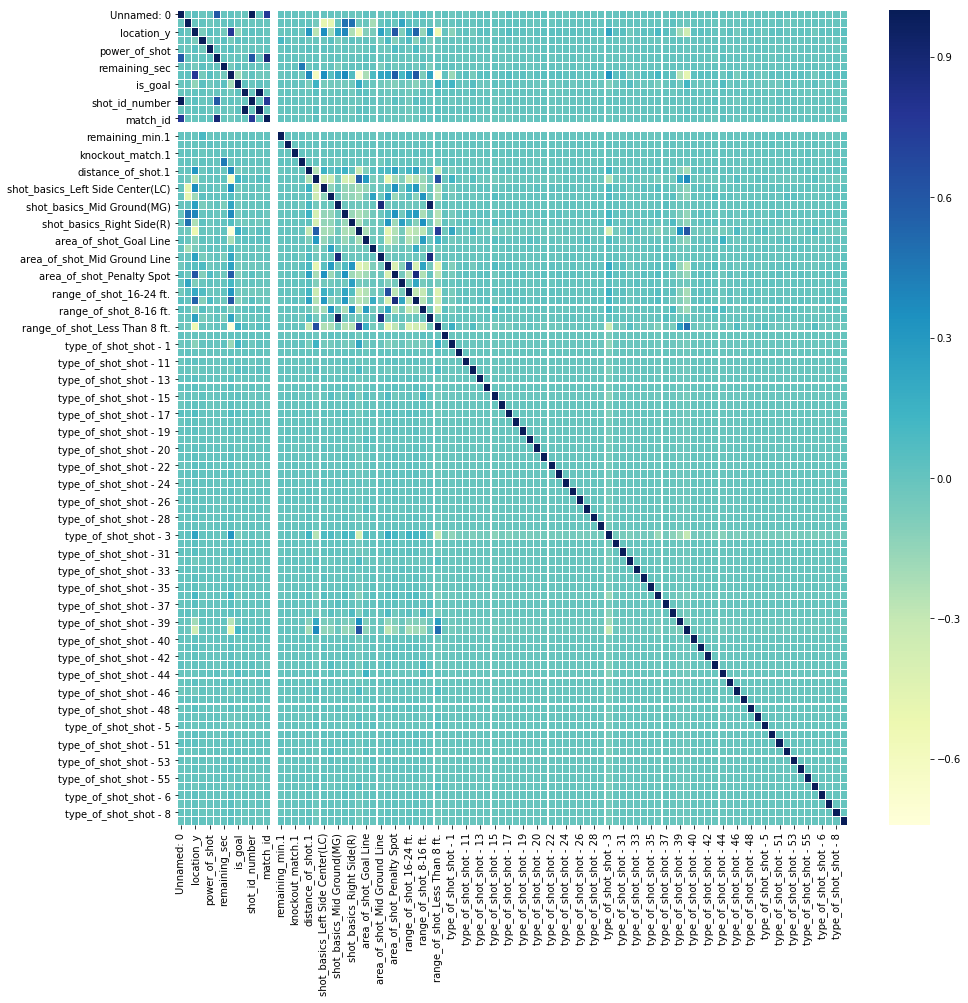

In [47]:
corrmat = train.corr() 
  
f, ax = plt.subplots(figsize =(15, 15)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 
